In [1]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchinfo import summary

import os
import glob
import time
import datetime as dt
from netCDF4 import Dataset as nc_Dataset
from netCDF4 import date2num, num2date
import pandas as pd
import numpy as np
import math
import xarray as xr
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.markers import MarkerStyle
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
PATH_HRRR_ORIGINAL = f"/data1/projects/RTMA/alex.schein/Regridded_HRRR/t2m"

In [3]:
var = xr.open_dataarray(f"{PATH_HRRR_ORIGINAL}/20201231/hrrr_regridded_20201231_t23z_f01.grib2", engine="cfgrib", decode_timedelta=True)

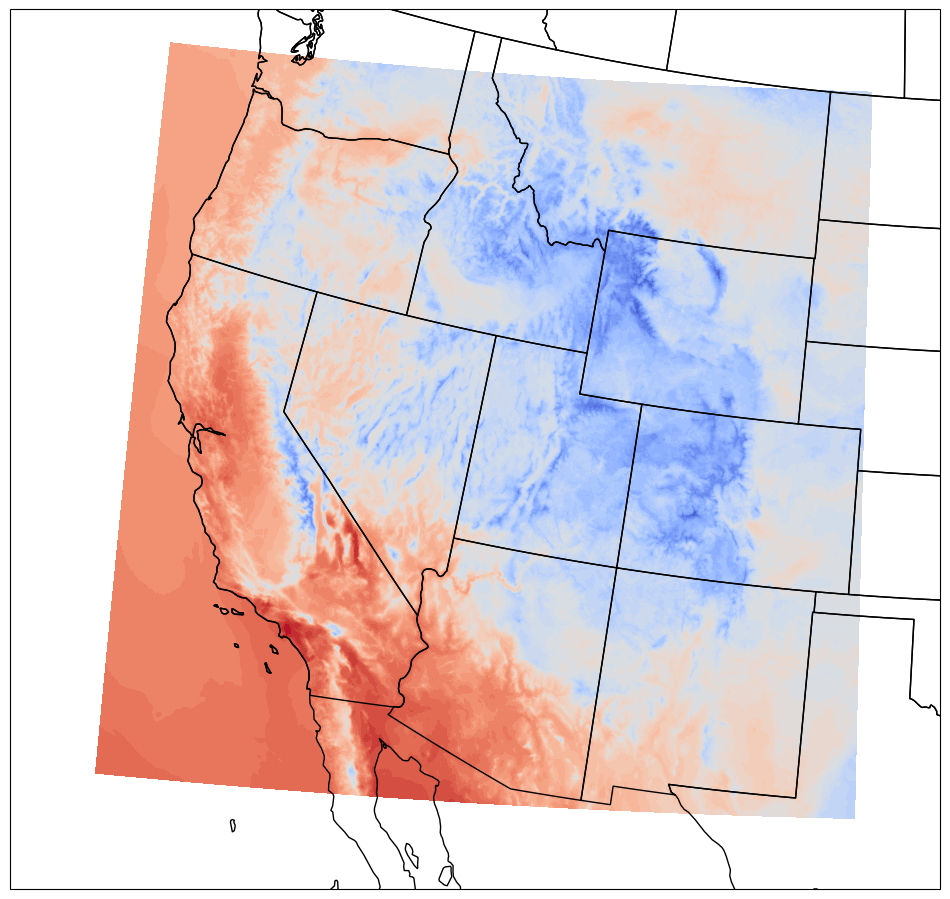

In [37]:
projection = ccrs.LambertConformal(central_longitude = 265-360,
                                    central_latitude = 38.5,
                                    standard_parallels = (38.5,38.5),
                                    cutoff = 0)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(1,1,1, projection=projection)

#ax1.set_extent([235-360, 265-360, 30, 45])
ax1.set_extent([235-360, 260-360, 30, 48])
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
ax1.add_feature(cfeature.STATES.with_scale('50m'))
# mks = MarkerStyle('o', fillstyle="none")

THINNING = 20

MIN_IDX_LON = 250
MIN_IDX_LAT = 400
IMG_SIZE_LON = 800
IMG_SIZE_LAT = 800

# ax1.contourf(var.longitude.data[::THINNING,::THINNING], var.latitude.data[::THINNING,::THINNING], var.data[::THINNING,::THINNING], levels=50, transform=ccrs.PlateCarree(), cmap="coolwarm")
ax1.contourf(var.longitude.data[MIN_IDX_LAT:MIN_IDX_LAT+IMG_SIZE_LAT, MIN_IDX_LON:MIN_IDX_LON+IMG_SIZE_LON], 
             var.latitude.data[MIN_IDX_LAT:MIN_IDX_LAT+IMG_SIZE_LAT, MIN_IDX_LON:MIN_IDX_LON+IMG_SIZE_LON], 
             var.data[MIN_IDX_LAT:MIN_IDX_LAT+IMG_SIZE_LAT, MIN_IDX_LON:MIN_IDX_LON+IMG_SIZE_LON], 
             levels=40, transform=ccrs.PlateCarree(), cmap="coolwarm")

plt.savefig(f"/scratch/RTMA/alex.schein/new_domain_20250728.png", bbox_inches='tight', dpi=200)

In [40]:
np.where(np.isnan(var.data[MIN_IDX_LAT:MIN_IDX_LAT+IMG_SIZE_LAT, MIN_IDX_LON:MIN_IDX_LON+IMG_SIZE_LON]))

(array([], dtype=int64), array([], dtype=int64))